**<center><h1>REGRESIÓN LOGISTICA</h1></center>**

En el contexto de la IA, la regresión logistica se aplica para construir un modelo matemático que relaciona variables de entrada (características) con una variable de salida (objetivo). <br>Por ejemplo, supongamos que deseamos predecir el precio de una casa en función de su tamaño y edad. Podemos usar la regresión lineal para encontrar la relación entre estas variables y luego utilizar el modelo resultante para predecir el precio de casas nuevas.

<br>En este notebook abordaremos la regresión logistica aplicada a la predicción de aprendices que se encuentran en riesgo de deserción, para lo cual tendremos los siguientes elementos: <br>
<ul>
    <li> Lectura y análisis de los datos </li>
    <li> Limpieza y transformación de los datos </li>
    <li> Entrenamiento de un modelo de regresión lineal </li>
    <li> Evaluación del modelo </li>
</ul>

**<h2>Lectura y análisis de los datos</h2>**

Realizar la instalación de scikit-learn <br>pip install scikit-learn

In [2]:
#importar las librerias

# Procesar la informacion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regresion Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Evaluacion del Modelo
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Cargar el dataset
df = pd.read_excel('Dataset_final.xlsx')

In [4]:
#Obtener informacion del dataset - Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Documento                  295 non-null    int64  
 1   Nombre                     295 non-null    object 
 2   Apellidos                  295 non-null    object 
 3   Direccción                 295 non-null    object 
 4   Teléfono                   295 non-null    object 
 5   Edad                       295 non-null    int64  
 6   Estatura                   295 non-null    float64
 7   Área de residencia         294 non-null    object 
 8   Tipo colegio               294 non-null    object 
 9   Género                     294 non-null    object 
 10  Estrato                    294 non-null    float64
 11  Nota Matematicas           294 non-null    float64
 12  Nota Lecto Escritura       294 non-null    float64
 13  Apoyo económico de padres  294 non-null    object 

In [5]:
#Obtener informacion del dataset - Datos
df

,Documento,Nombre,Apellidos,Direccción,Teléfono,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,115320053,Sofia,Gómez,"Calle 100 #25-26, Bogotá, Colombia",+57 311 2345678,23,1.57,Urbana,Público,Femenino,3.0,1.0,3.0,No,11.0
1,1105101947,Santiago,González,"Carrera 14 #10-20, Medellín, Colombia",+57 317 3456789,19,1.75,Urbana,Privado,Masculino,4.0,5.0,4.0,Sí,11.0
2,1023100010,Valentina,Herrera,"Vereda San José, Girardota, Colombia",+57 312 4567890,16,1.63,Rural,Público,Femenino,1.0,3.0,2.0,Sí,9.0
3,1208200021,Juan,Rojas,"Calle 30 #18-15, Bucaramanga, Colombia",+57 320 5678901,17,1.80,Urbana,Público,Masculino,2.0,2.0,2.0,No,10.0
4,1050500050,Catalina,Jiménez,"Avenida 5 #23-45, Cali, Colombia",+57 319 6789012,15,1.64,Urbana,Privado,Femenino,4.0,4.0,5.0,Sí,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1645678901,Isabel,Gonzalez,Av. Bolívar 789,3478901,16,1.62,Urbana,Público,Femenino,4.0,4.0,4.0,Si,11.0
291,1656789012,Julio,Perez,El Bosque 234,3123456,18,1.80,Rural,Privado,Masculino,5.0,5.0,5.0,Si,11.0
292,1667890123,Ana,Martinez,Carrera 7 567,3289012,17,1.65,Urbana,Público,Femenino,2.0,3.0,3.0,No,10.0
293,1678901234,David,Perez,Barrio Las Margaritas 123,3256789,16,1.80,Urba,Privado,Masculino,3.0,3.0,3.0,Si,10.0


**<h2>Limpieza y transformación de los datos</h2>**

In [6]:
#Eliminar las filas con valores nulos
df = df.dropna()

In [7]:
#Obtener informacion del dataset - Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Documento                  294 non-null    int64  
 1   Nombre                     294 non-null    object 
 2   Apellidos                  294 non-null    object 
 3   Direccción                 294 non-null    object 
 4   Teléfono                   294 non-null    object 
 5   Edad                       294 non-null    int64  
 6   Estatura                   294 non-null    float64
 7   Área de residencia         294 non-null    object 
 8   Tipo colegio               294 non-null    object 
 9   Género                     294 non-null    object 
 10  Estrato                    294 non-null    float64
 11  Nota Matematicas           294 non-null    float64
 12  Nota Lecto Escritura       294 non-null    float64
 13  Apoyo económico de padres  294 non-null    object 

In [8]:
# CONVERSION DE ETIQUETAS SEGUN EL METODO

#Reemplazar Sí por Si en la columna "Apoyo económico de padres"
df['Apoyo económico de padres'] = df['Apoyo económico de padres'].replace('Sí', 'Si')

#Crear la columna "Apoyo economico" y asignarle un valor de 0 si es no o 1 si es si
df['Apoyo económico de padres'] = np.where(df['Apoyo económico de padres'] == 'Si', 1, 0)

#Crear la columna "Género" -> Femenimo:0 y Masculino:1
df['Género'] = np.where(df['Género'] == 'Femenino', 0, 1)

#Reemplazar los valores incompletos por Publico
df['Tipo colegio'] = df['Tipo colegio'].replace('Privad', 'Privado')

#Crear la columna "Colegio" -> Público:0 y Privado:1
df['Tipo colegio'] = np.where(df['Tipo colegio'] == 'Privado', 1, 0)

#Crear la columna "Área de residencia" -> Urbana:0 y Rural:1
df['Área de residencia'] = np.where(df['Área de residencia'] == 'Rural', 1, 0)

<ipython-input-8-7924f1ab1593>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Apoyo económico de padres'] = df['Apoyo económico de padres'].replace('Sí', 'Si')
<ipython-input-8-7924f1ab1593>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Apoyo económico de padres'] = np.where(df['Apoyo económico de padres'] == 'Si', 1, 0)
<ipython-input-8-7924f1ab1593>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [9]:
df

,Documento,Nombre,Apellidos,Direccción,Teléfono,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,115320053,Sofia,Gómez,"Calle 100 #25-26, Bogotá, Colombia",+57 311 2345678,23,1.57,0,0,0,3.0,1.0,3.0,0,11.0
1,1105101947,Santiago,González,"Carrera 14 #10-20, Medellín, Colombia",+57 317 3456789,19,1.75,0,1,1,4.0,5.0,4.0,1,11.0
2,1023100010,Valentina,Herrera,"Vereda San José, Girardota, Colombia",+57 312 4567890,16,1.63,1,0,0,1.0,3.0,2.0,1,9.0
3,1208200021,Juan,Rojas,"Calle 30 #18-15, Bucaramanga, Colombia",+57 320 5678901,17,1.80,0,0,1,2.0,2.0,2.0,0,10.0
4,1050500050,Catalina,Jiménez,"Avenida 5 #23-45, Cali, Colombia",+57 319 6789012,15,1.64,0,1,0,4.0,4.0,5.0,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1645678901,Isabel,Gonzalez,Av. Bolívar 789,3478901,16,1.62,0,0,0,4.0,4.0,4.0,1,11.0
291,1656789012,Julio,Perez,El Bosque 234,3123456,18,1.80,1,1,1,5.0,5.0,5.0,1,11.0
292,1667890123,Ana,Martinez,Carrera 7 567,3289012,17,1.65,0,0,0,2.0,3.0,3.0,0,10.0
293,1678901234,David,Perez,Barrio Las Margaritas 123,3256789,16,1.80,0,1,1,3.0,3.0,3.0,1,10.0


In [10]:
#Eliminar las columnas que no se van a utilizar
df = df.drop(['Documento', 'Nombre', 'Apellidos', 'Direccción', 'Teléfono'], axis=1)

In [11]:
df

,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,23,1.57,0,0,0,3.0,1.0,3.0,0,11.0
1,19,1.75,0,1,1,4.0,5.0,4.0,1,11.0
2,16,1.63,1,0,0,1.0,3.0,2.0,1,9.0
3,17,1.80,0,0,1,2.0,2.0,2.0,0,10.0
4,15,1.64,0,1,0,4.0,4.0,5.0,1,10.0
...,...,...,...,...,...,...,...,...,...,...
290,16,1.62,0,0,0,4.0,4.0,4.0,1,11.0
291,18,1.80,1,1,1,5.0,5.0,5.0,1,11.0
292,17,1.65,0,0,0,2.0,3.0,3.0,0,10.0
293,16,1.80,0,1,1,3.0,3.0,3.0,1,10.0


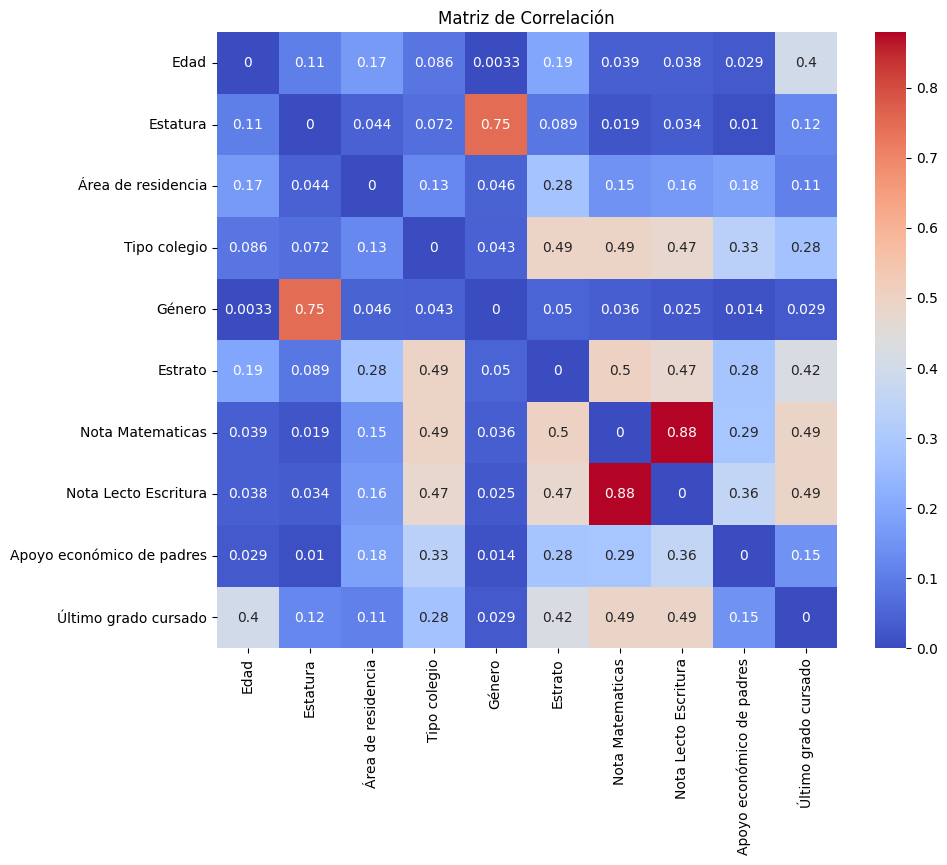

In [12]:
# Calcular la matriz de correlación de todas las variables del DataFrame
correlation_matrix = df.corr().abs()

# Excluir la diagonal de la matriz de correlación
np.fill_diagonal(correlation_matrix.values, 0)

# Obtener las variables más correlacionadas
most_correlated = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Visualizar las variables más correlacionadas usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [13]:
# Imprimir las variables más correlacionadas
for (var1, var2), correlacion in most_correlated.items():
    print(f"Las variables '{var1}' y '{var2}' tienen una correlación de {correlacion}.")

Las variables 'Nota Matematicas' y 'Nota Lecto Escritura' tienen una correlación de 0.8791409294144626.
Las variables 'Género' y 'Estatura' tienen una correlación de 0.748623045517334.
Las variables 'Nota Matematicas' y 'Estrato' tienen una correlación de 0.49980986674334094.
Las variables 'Tipo colegio' y 'Nota Matematicas' tienen una correlación de 0.4919918470036402.
Las variables 'Estrato' y 'Tipo colegio' tienen una correlación de 0.49183326850347103.
Las variables 'Último grado cursado' y 'Nota Matematicas' tienen una correlación de 0.4902080821294931.
Las variables 'Último grado cursado' y 'Nota Lecto Escritura' tienen una correlación de 0.48879918670351447.
Las variables 'Nota Lecto Escritura' y 'Tipo colegio' tienen una correlación de 0.47477323528228726.
Las variables 'Nota Lecto Escritura' y 'Estrato' tienen una correlación de 0.47449196012504585.
Las variables 'Estrato' y 'Último grado cursado' tienen una correlación de 0.4248114755826642.
Las variables 'Último grado cursad

In [14]:
#Eliminar las columnas que no se correlacionan
df = df.drop(['Edad', 'Área de residencia', 'Género', 'Estatura'], axis=1)

In [15]:
df

,Tipo colegio,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,0,3.0,1.0,3.0,0,11.0
1,1,4.0,5.0,4.0,1,11.0
2,0,1.0,3.0,2.0,1,9.0
3,0,2.0,2.0,2.0,0,10.0
4,1,4.0,4.0,5.0,1,10.0
...,...,...,...,...,...,...
290,0,4.0,4.0,4.0,1,11.0
291,1,5.0,5.0,5.0,1,11.0
292,0,2.0,3.0,3.0,0,10.0
293,1,3.0,3.0,3.0,1,10.0


In [16]:
#Cambiar el nombre de las columnas correlacionadas
df.columns = ['tipo_colegio', 'estrato', 'matematicas', 'lecto_escritura', 'apoyo_economico', 'ultimo_grado']

In [17]:
df

,tipo_colegio,estrato,matematicas,lecto_escritura,apoyo_economico,ultimo_grado
0,0,3.0,1.0,3.0,0,11.0
1,1,4.0,5.0,4.0,1,11.0
2,0,1.0,3.0,2.0,1,9.0
3,0,2.0,2.0,2.0,0,10.0
4,1,4.0,4.0,5.0,1,10.0
...,...,...,...,...,...,...
290,0,4.0,4.0,4.0,1,11.0
291,1,5.0,5.0,5.0,1,11.0
292,0,2.0,3.0,3.0,0,10.0
293,1,3.0,3.0,3.0,1,10.0


In [18]:
# Crear la columna "promedio"
df['promedio'] = (df['matematicas'] + df['lecto_escritura']) / 2

In [19]:
df

,tipo_colegio,estrato,matematicas,lecto_escritura,apoyo_economico,ultimo_grado,promedio
0,0,3.0,1.0,3.0,0,11.0,2.0
1,1,4.0,5.0,4.0,1,11.0,4.5
2,0,1.0,3.0,2.0,1,9.0,2.5
3,0,2.0,2.0,2.0,0,10.0,2.0
4,1,4.0,4.0,5.0,1,10.0,4.5
...,...,...,...,...,...,...,...
290,0,4.0,4.0,4.0,1,11.0,4.0
291,1,5.0,5.0,5.0,1,11.0,5.0
292,0,2.0,3.0,3.0,0,10.0,3.0
293,1,3.0,3.0,3.0,1,10.0,3.0


In [20]:
# Crear la columna 'Riesgo' y asignar valores según el rango del promedio
# <=3 -> 0: Desercion - <=4 -> 1: Alerta - 2: Buen estudiante
df['Riesgo'] = np.where(df['promedio'] <= 3, 0, np.where(df['promedio'] <= 4, 1, 2))

In [21]:
df

,tipo_colegio,estrato,matematicas,lecto_escritura,apoyo_economico,ultimo_grado,promedio,Riesgo
0,0,3.0,1.0,3.0,0,11.0,2.0,0
1,1,4.0,5.0,4.0,1,11.0,4.5,2
2,0,1.0,3.0,2.0,1,9.0,2.5,0
3,0,2.0,2.0,2.0,0,10.0,2.0,0
4,1,4.0,4.0,5.0,1,10.0,4.5,2
...,...,...,...,...,...,...,...,...
290,0,4.0,4.0,4.0,1,11.0,4.0,1
291,1,5.0,5.0,5.0,1,11.0,5.0,2
292,0,2.0,3.0,3.0,0,10.0,3.0,0
293,1,3.0,3.0,3.0,1,10.0,3.0,0


**<h2>Entrenamiento de un modelo de regresión</h2>**

In [22]:
# Seleccionar las variables relevantes para la regresión
variables = ['tipo_colegio',	'estrato',	'matematicas',	'lecto_escritura',	'apoyo_economico',	'ultimo_grado']

X = df[variables]
y = df['Riesgo']

In [23]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Crear el modelo de regresión lineal
model = LogisticRegression(max_iter=1000)

In [26]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

**<h2>Evaluación del modelo</h2>**

La **precisión** es una medida que indica la proporción de predicciones correctas sobre el total de predicciones. Se expresa como un valor entre 0 y 1, donde 1 significa que todas las predicciones fueron correctas y 0 significa que todas fueron incorrectas.

In [28]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: %.2f' % accuracy)

Precisión del modelo: 1.00


La **matriz de confusión** es una herramienta útil para evaluar el desempeño de un modelo de clasificación. Muestra la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos en función de las predicciones del modelo en comparación con las etiquetas reales del conjunto de prueba.

La matriz es una matriz cuadrada donde las filas representan las clases reales y las columnas representan las clases predichas por el modelo.

In [29]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

Matriz de confusión:
[[30  0  0]
 [ 0 17  0]
 [ 0  0 12]]


**Interpretación** de la matriz de confusión:

*   En la primera fila, hay 30 muestras de la clase real "Deserción" (clase 0). El modelo las ha predicho correctamente como "Deserción" (verdaderos positivos).
*   En la segunda fila, hay 17 muestras de la clase real "Alerta" (clase 1). El modelo las ha predicho correctamente como "Alerta" (verdaderos positivos).
*   En la tercera fila, hay 12 muestras de la clase real "Buen estudiante" (clase 2). El modelo las ha predicho correctamente como "Buen estudiante" (verdaderos positivos).

# **Prediccion Futura**

In [40]:
# Valores futuros
tipo_colegio = 1
estrato = 2
matematicas = 0
lecto_escritura = 0
apoyo_economico = 1
ultimo_grado = 11

In [41]:
# Realizar una predicción de probabilidades para la predicción futura
pred_probabilities = model.predict_proba([[tipo_colegio, estrato, matematicas, lecto_escritura,
                                                    apoyo_economico, ultimo_grado]])

# Obtener los nombres de las clases (Deserción, Alerta, Buen estudiante)
class_names = model.classes_

# Imprimir las probabilidades de cada clase para la predicción futura
for i, class_name in enumerate(class_names):
    prob = pred_probabilities[0, i] * 100
    print(f"Probabilidad de {class_name}: {round(prob, 2)}%")

Probabilidad de 0: 0.03%
Probabilidad de 1: 98.65%
Probabilidad de 2: 1.32%


<h2>Guardar el modelo entrenado y ajustado</h2>

In [42]:
import pickle

# Guardar el modelo en un archivo
with open('modelo_regresion.pkl', 'wb') as file:
    pickle.dump(model, file)